Best Model : The one with 10 bins

In [1]:

import numpy 
import matplotlib.pyplot as plt
import pandas 
import math
from matplotlib import pyplot
from pandas import DataFrame

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import array

from keras.layers import Input ,Dense, Dropout, Activation, LSTM
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Reshape,Conv2D
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed

from keras.utils import np_utils


import cv2
from keras.preprocessing.image import img_to_array





import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator



from keras import models

from matplotlib import pyplot
from numpy import array
from pandas import DataFrame
import numpy as np

from numpy import array

from keras.layers import Dense
from matplotlib import pyplot



from keras import backend as K
from sklearn.metrics import mean_absolute_error





from keras import models

from matplotlib import pyplot
from numpy import array
from pandas import DataFrame
from keras import backend as K

from keras import optimizers



/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
results_rmse = []
results_mae = []

In [3]:
def train_colorbin_models(num_bins):
    numpy.random.seed(3)
    time_steps=19
    # load the dataset
    dataframe = pandas.read_csv('./Trainold.csv')
    dataset = dataframe.values

    scaler = MinMaxScaler(feature_range=(0, 1))


    #print(dataset)

    # we group by video so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    trainX=[]
    trainY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than time_steps datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values
        vidImPath=vid.iloc[:,0:2].values    

        if len(total) < time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()

        for i in range(0,time_steps):
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Train/"+videoName+"/"+imgName
            image = cv2.imread(path)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()
            #img_arr = img_to_array(image)
            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)

        trainX.append(histValuesList)
        trainY.append([max_total_for_vid])
        #trainY.append(scoreList)


    print(len(trainX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    trainX=numpy.array(trainX)
    trainY=numpy.array(trainY)

    print(trainX.shape,trainY.shape)




    # load the dataset
    dataframe = pandas.read_csv('./Test.csv')
    dataset = dataframe.values

    #print(dataset)

    # we group by day so we can process a video at a time.
    grouped = dataframe.groupby(dataframe.VidName)

    per_vid = []
    for _, group in grouped:
        per_vid.append(group)



    print(len(per_vid))



    testX=[]
    testY=[]

    # generate sequences a vid at a time
    for i,vid in enumerate(per_vid):
        histValuesList=[]
        scoreList=[]
        # if we have less than time_steps datapoints for a vid we skip over the
        # vid assuming something is missing in the raw data

        total = vid.iloc[:,4:20].values

        vidImPath=vid.iloc[:,0:2].values


        if len(total)<time_steps :
            continue
        scoreVal=vid["Score"].values[0] + 1    
        max_total_for_vid = scoreVal.tolist()
        #max_total_for_vid = vid["Score"].values[0].tolist()


        for i in range(0,time_steps):
            #histValuesList.append(total[i])
            #print("Vid and Img name")
            #print(req[i][0],req[i][1])
            videoName=vidImPath[i][0]
            imgName=vidImPath[i][1]
            path="./IMAGES/Test/"+videoName+"/"+imgName
            image = cv2.imread(path)
            #img_arr = img_to_array(image)
            hist = cv2.calcHist([image], [0, 1, 2], None, [num_bins, num_bins, num_bins], [0, 256, 0, 256, 0, 256])
            hist_arr = hist.flatten()

            histValuesList.append(hist_arr)
            #scoreList.append(max_total_for_vid)


        testX.append(histValuesList)
        testY.append([max_total_for_vid])
        #testY.append(scoreList)


    print(len(testX[0]))
    #trainX = np.array([np.array(xi) for xi in trainX])

    testX=numpy.array(testX)
    testY=numpy.array(testY)

    print(testX.shape,testY.shape)




    trainX=numpy.array(trainX)
    trainX=trainX.reshape(-1,num_bins**3)

    trainX = trainX/numpy.max(trainX)

    trainX=trainX.reshape(-1,19,num_bins**3)
    print(trainX.shape,trainY.shape)




    testX=numpy.array(testX)
    testX=testX.reshape(-1,num_bins**3)

    testX = testX/numpy.max(testX)

    testX=testX.reshape(-1,19,num_bins**3)
    print(testX.shape,testY.shape)




    adam1 = optimizers.Adam(lr=0.001)
    sgd1 = optimizers.SGD(lr=0.005)

    print('Build model...')
    # Build Model
    model = Sequential()  
    model.add(LSTM(100, input_shape=(19, num_bins**3))) #200
    model.add(Dense(1))
    model.add(Dropout(0.1))
    model.compile(loss='mse', optimizer=sgd1,metrics=['mse'])
    model.fit(trainX, trainY, nb_epoch=500, batch_size=19, verbose=2,shuffle=True) #500 batch =20     


    # make predictions
    trainPredict = model.predict(trainX)


    trainScore = mean_squared_error(trainY, trainPredict)
    print('Train Score: %.2f MSE' % (trainScore))






    def root_mean_squared_error(y_true, y_pred):
            return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    pred=model.predict(testX)

    print(pred.shape)
    print(testY.shape)



    testScore = mean_squared_error(testY, pred)
    print('Test Score: %.2f MSE' % (testScore))

    
    rmse = np.sqrt(((pred - testY) ** 2).mean(axis=0))
    print('RMSE Score: %.2f rmse' % (rmse))

    mae = mean_absolute_error(testY, pred)
    print('MAE Score: %.2f mae' % (mae))


    for i in range(0,len(pred)):

        print(testY[i],pred[i])

    results_rmse.append(rmse)
    results_mae.append(mae)


In [4]:
for i in [8,10,16,32]:
    train_colorbin_models(i)

117
19
(114, 19, 512) (114, 1)
55
19
(52, 19, 512) (52, 1)
(114, 19, 512) (114, 1)
(52, 19, 512) (52, 1)
Build model...


/Users/SindhuPhani/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
 - 1s - loss: 3.2349 - mean_squared_error: 3.2349
Epoch 2/500
 - 0s - loss: 2.6472 - mean_squared_error: 2.6472
Epoch 3/500
 - 0s - loss: 2.1445 - mean_squared_error: 2.1445
Epoch 4/500
 - 0s - loss: 1.9301 - mean_squared_error: 1.9301
Epoch 5/500
 - 0s - loss: 1.6619 - mean_squared_error: 1.6619
Epoch 6/500
 - 0s - loss: 1.4134 - mean_squared_error: 1.4134
Epoch 7/500
 - 0s - loss: 1.3342 - mean_squared_error: 1.3342
Epoch 8/500
 - 0s - loss: 1.6077 - mean_squared_error: 1.6077
Epoch 9/500
 - 0s - loss: 1.3241 - mean_squared_error: 1.3241
Epoch 10/500
 - 0s - loss: 1.1588 - mean_squared_error: 1.1588
Epoch 11/500
 - 0s - loss: 1.2422 - mean_squared_error: 1.2422
Epoch 12/500
 - 0s - loss: 1.3039 - mean_squared_error: 1.3039
Epoch 13/500
 - 0s - loss: 1.2960 - mean_squared_error: 1.2960
Epoch 14/500
 - 0s - loss: 1.3983 - mean_squared_error: 1.3983
Epoch 15/500
 - 0s - loss: 1.3202 - mean_squared_error: 1.3202
Epoch 16/500
 - 0s - loss: 1.2997 - mean_squared_error: 1.2997
E

Epoch 131/500
 - 0s - loss: 1.4112 - mean_squared_error: 1.4112
Epoch 132/500
 - 0s - loss: 1.1226 - mean_squared_error: 1.1226
Epoch 133/500
 - 0s - loss: 1.3302 - mean_squared_error: 1.3302
Epoch 134/500
 - 0s - loss: 1.1364 - mean_squared_error: 1.1364
Epoch 135/500
 - 0s - loss: 1.1284 - mean_squared_error: 1.1284
Epoch 136/500
 - 0s - loss: 1.1924 - mean_squared_error: 1.1924
Epoch 137/500
 - 0s - loss: 1.0770 - mean_squared_error: 1.0770
Epoch 138/500
 - 0s - loss: 1.2652 - mean_squared_error: 1.2652
Epoch 139/500
 - 0s - loss: 1.1976 - mean_squared_error: 1.1976
Epoch 140/500
 - 0s - loss: 1.2678 - mean_squared_error: 1.2678
Epoch 141/500
 - 0s - loss: 1.0930 - mean_squared_error: 1.0930
Epoch 142/500
 - 0s - loss: 1.0452 - mean_squared_error: 1.0452
Epoch 143/500
 - 0s - loss: 1.4171 - mean_squared_error: 1.4171
Epoch 144/500
 - 0s - loss: 1.1297 - mean_squared_error: 1.1297
Epoch 145/500
 - 0s - loss: 1.2269 - mean_squared_error: 1.2269
Epoch 146/500
 - 0s - loss: 1.6579 - mea

 - 0s - loss: 1.1529 - mean_squared_error: 1.1529
Epoch 260/500
 - 0s - loss: 1.0387 - mean_squared_error: 1.0387
Epoch 261/500
 - 0s - loss: 1.3699 - mean_squared_error: 1.3699
Epoch 262/500
 - 0s - loss: 1.2011 - mean_squared_error: 1.2011
Epoch 263/500
 - 0s - loss: 1.2934 - mean_squared_error: 1.2934
Epoch 264/500
 - 0s - loss: 1.0977 - mean_squared_error: 1.0977
Epoch 265/500
 - 0s - loss: 1.1073 - mean_squared_error: 1.1073
Epoch 266/500
 - 0s - loss: 1.1436 - mean_squared_error: 1.1436
Epoch 267/500
 - 0s - loss: 1.0854 - mean_squared_error: 1.0854
Epoch 268/500
 - 0s - loss: 0.9691 - mean_squared_error: 0.9691
Epoch 269/500
 - 0s - loss: 1.1483 - mean_squared_error: 1.1483
Epoch 270/500
 - 0s - loss: 1.1011 - mean_squared_error: 1.1011
Epoch 271/500
 - 0s - loss: 1.2321 - mean_squared_error: 1.2321
Epoch 272/500
 - 0s - loss: 1.3818 - mean_squared_error: 1.3818
Epoch 273/500
 - 0s - loss: 1.4857 - mean_squared_error: 1.4857
Epoch 274/500
 - 0s - loss: 1.0473 - mean_squared_erro

Epoch 388/500
 - 0s - loss: 1.3504 - mean_squared_error: 1.3504
Epoch 389/500
 - 0s - loss: 1.0106 - mean_squared_error: 1.0106
Epoch 390/500
 - 0s - loss: 1.1419 - mean_squared_error: 1.1419
Epoch 391/500
 - 0s - loss: 1.0833 - mean_squared_error: 1.0833
Epoch 392/500
 - 0s - loss: 0.8577 - mean_squared_error: 0.8577
Epoch 393/500
 - 0s - loss: 0.9997 - mean_squared_error: 0.9997
Epoch 394/500
 - 0s - loss: 0.9564 - mean_squared_error: 0.9564
Epoch 395/500
 - 0s - loss: 0.9616 - mean_squared_error: 0.9616
Epoch 396/500
 - 0s - loss: 1.1806 - mean_squared_error: 1.1806
Epoch 397/500
 - 0s - loss: 0.9573 - mean_squared_error: 0.9573
Epoch 398/500
 - 0s - loss: 1.0571 - mean_squared_error: 1.0571
Epoch 399/500
 - 0s - loss: 0.9740 - mean_squared_error: 0.9740
Epoch 400/500
 - 0s - loss: 1.1205 - mean_squared_error: 1.1205
Epoch 401/500
 - 0s - loss: 0.9293 - mean_squared_error: 0.9293
Epoch 402/500
 - 0s - loss: 0.8895 - mean_squared_error: 0.8895
Epoch 403/500
 - 0s - loss: 0.9679 - mea

19
(52, 19, 1000) (52, 1)
(114, 19, 1000) (114, 1)
(52, 19, 1000) (52, 1)
Build model...
Epoch 1/500
 - 1s - loss: 3.0719 - mean_squared_error: 3.0719
Epoch 2/500
 - 0s - loss: 2.5393 - mean_squared_error: 2.5393
Epoch 3/500
 - 0s - loss: 2.0705 - mean_squared_error: 2.0705
Epoch 4/500
 - 0s - loss: 1.8841 - mean_squared_error: 1.8841
Epoch 5/500
 - 0s - loss: 1.6257 - mean_squared_error: 1.6257
Epoch 6/500
 - 0s - loss: 1.3864 - mean_squared_error: 1.3864
Epoch 7/500
 - 0s - loss: 1.3160 - mean_squared_error: 1.3160
Epoch 8/500
 - 0s - loss: 1.5992 - mean_squared_error: 1.5992
Epoch 9/500
 - 0s - loss: 1.3157 - mean_squared_error: 1.3157
Epoch 10/500
 - 0s - loss: 1.1507 - mean_squared_error: 1.1507
Epoch 11/500
 - 0s - loss: 1.2378 - mean_squared_error: 1.2378
Epoch 12/500
 - 0s - loss: 1.2996 - mean_squared_error: 1.2996
Epoch 13/500
 - 0s - loss: 1.2912 - mean_squared_error: 1.2912
Epoch 14/500
 - 0s - loss: 1.3927 - mean_squared_error: 1.3927
Epoch 15/500
 - 0s - loss: 1.3172 - me

Epoch 130/500
 - 0s - loss: 1.1244 - mean_squared_error: 1.1244
Epoch 131/500
 - 0s - loss: 1.4198 - mean_squared_error: 1.4198
Epoch 132/500
 - 0s - loss: 1.1338 - mean_squared_error: 1.1338
Epoch 133/500
 - 0s - loss: 1.3419 - mean_squared_error: 1.3419
Epoch 134/500
 - 0s - loss: 1.1454 - mean_squared_error: 1.1454
Epoch 135/500
 - 0s - loss: 1.1366 - mean_squared_error: 1.1366
Epoch 136/500
 - 0s - loss: 1.2018 - mean_squared_error: 1.2018
Epoch 137/500
 - 0s - loss: 1.0860 - mean_squared_error: 1.0860
Epoch 138/500
 - 0s - loss: 1.2781 - mean_squared_error: 1.2781
Epoch 139/500
 - 0s - loss: 1.2056 - mean_squared_error: 1.2056
Epoch 140/500
 - 0s - loss: 1.2719 - mean_squared_error: 1.2719
Epoch 141/500
 - 0s - loss: 1.1053 - mean_squared_error: 1.1053
Epoch 142/500
 - 0s - loss: 1.0568 - mean_squared_error: 1.0568
Epoch 143/500
 - 0s - loss: 1.4231 - mean_squared_error: 1.4231
Epoch 144/500
 - 0s - loss: 1.1394 - mean_squared_error: 1.1394
Epoch 145/500
 - 0s - loss: 1.2380 - mea

 - 0s - loss: 0.8874 - mean_squared_error: 0.8874
Epoch 259/500
 - 0s - loss: 1.1743 - mean_squared_error: 1.1743
Epoch 260/500
 - 0s - loss: 1.0588 - mean_squared_error: 1.0588
Epoch 261/500
 - 0s - loss: 1.3966 - mean_squared_error: 1.3966
Epoch 262/500
 - 0s - loss: 1.2244 - mean_squared_error: 1.2244
Epoch 263/500
 - 0s - loss: 1.3099 - mean_squared_error: 1.3099
Epoch 264/500
 - 0s - loss: 1.1229 - mean_squared_error: 1.1229
Epoch 265/500
 - 0s - loss: 1.1207 - mean_squared_error: 1.1207
Epoch 266/500
 - 0s - loss: 1.1743 - mean_squared_error: 1.1743
Epoch 267/500
 - 0s - loss: 1.1104 - mean_squared_error: 1.1104
Epoch 268/500
 - 0s - loss: 0.9968 - mean_squared_error: 0.9968
Epoch 269/500
 - 0s - loss: 1.1646 - mean_squared_error: 1.1646
Epoch 270/500
 - 0s - loss: 1.1306 - mean_squared_error: 1.1306
Epoch 271/500
 - 0s - loss: 1.2587 - mean_squared_error: 1.2587
Epoch 272/500
 - 0s - loss: 1.4048 - mean_squared_error: 1.4048
Epoch 273/500
 - 0s - loss: 1.5115 - mean_squared_erro

Epoch 387/500
 - 0s - loss: 1.0137 - mean_squared_error: 1.0137
Epoch 388/500
 - 0s - loss: 1.3840 - mean_squared_error: 1.3840
Epoch 389/500
 - 0s - loss: 1.0310 - mean_squared_error: 1.0310
Epoch 390/500
 - 0s - loss: 1.1717 - mean_squared_error: 1.1717
Epoch 391/500
 - 0s - loss: 1.1102 - mean_squared_error: 1.1102
Epoch 392/500
 - 0s - loss: 0.9006 - mean_squared_error: 0.9006
Epoch 393/500
 - 0s - loss: 1.0310 - mean_squared_error: 1.0310
Epoch 394/500
 - 0s - loss: 0.9936 - mean_squared_error: 0.9936
Epoch 395/500
 - 0s - loss: 0.9962 - mean_squared_error: 0.9962
Epoch 396/500
 - 0s - loss: 1.2114 - mean_squared_error: 1.2114
Epoch 397/500
 - 0s - loss: 0.9806 - mean_squared_error: 0.9806
Epoch 398/500
 - 0s - loss: 1.0810 - mean_squared_error: 1.0810
Epoch 399/500
 - 0s - loss: 1.0118 - mean_squared_error: 1.0118
Epoch 400/500
 - 0s - loss: 1.1537 - mean_squared_error: 1.1537
Epoch 401/500
 - 0s - loss: 0.9625 - mean_squared_error: 0.9625
Epoch 402/500
 - 0s - loss: 0.9058 - mea

19
(114, 19, 4096) (114, 1)
55
19
(52, 19, 4096) (52, 1)
(114, 19, 4096) (114, 1)
(52, 19, 4096) (52, 1)
Build model...
Epoch 1/500
 - 2s - loss: 3.0942 - mean_squared_error: 3.0942
Epoch 2/500
 - 1s - loss: 2.5650 - mean_squared_error: 2.5650
Epoch 3/500
 - 1s - loss: 2.0961 - mean_squared_error: 2.0961
Epoch 4/500
 - 1s - loss: 1.9050 - mean_squared_error: 1.9050
Epoch 5/500
 - 1s - loss: 1.6445 - mean_squared_error: 1.6445
Epoch 6/500
 - 1s - loss: 1.4024 - mean_squared_error: 1.4024
Epoch 7/500
 - 1s - loss: 1.3287 - mean_squared_error: 1.3287
Epoch 8/500
 - 1s - loss: 1.6049 - mean_squared_error: 1.6049
Epoch 9/500
 - 1s - loss: 1.3217 - mean_squared_error: 1.3217
Epoch 10/500
 - 1s - loss: 1.1560 - mean_squared_error: 1.1560
Epoch 11/500
 - 1s - loss: 1.2424 - mean_squared_error: 1.2424
Epoch 12/500
 - 1s - loss: 1.3032 - mean_squared_error: 1.3032
Epoch 13/500
 - 1s - loss: 1.2954 - mean_squared_error: 1.2954
Epoch 14/500
 - 1s - loss: 1.3971 - mean_squared_error: 1.3971
Epoch 1

Epoch 129/500
 - 1s - loss: 1.1647 - mean_squared_error: 1.1647
Epoch 130/500
 - 1s - loss: 1.1373 - mean_squared_error: 1.1373
Epoch 131/500
 - 1s - loss: 1.4307 - mean_squared_error: 1.4307
Epoch 132/500
 - 1s - loss: 1.1436 - mean_squared_error: 1.1436
Epoch 133/500
 - 1s - loss: 1.3541 - mean_squared_error: 1.3541
Epoch 134/500
 - 1s - loss: 1.1582 - mean_squared_error: 1.1582
Epoch 135/500
 - 1s - loss: 1.1502 - mean_squared_error: 1.1502
Epoch 136/500
 - 1s - loss: 1.2141 - mean_squared_error: 1.2141
Epoch 137/500
 - 1s - loss: 1.0965 - mean_squared_error: 1.0965
Epoch 138/500
 - 1s - loss: 1.2884 - mean_squared_error: 1.2884
Epoch 139/500
 - 1s - loss: 1.2221 - mean_squared_error: 1.2221
Epoch 140/500
 - 1s - loss: 1.2841 - mean_squared_error: 1.2841
Epoch 141/500
 - 1s - loss: 1.1161 - mean_squared_error: 1.1161
Epoch 142/500
 - 1s - loss: 1.0668 - mean_squared_error: 1.0668
Epoch 143/500
 - 1s - loss: 1.4360 - mean_squared_error: 1.4360
Epoch 144/500
 - 1s - loss: 1.1511 - mea

 - 1s - loss: 1.2996 - mean_squared_error: 1.2996
Epoch 258/500
 - 1s - loss: 0.8989 - mean_squared_error: 0.8989
Epoch 259/500
 - 1s - loss: 1.2009 - mean_squared_error: 1.2009
Epoch 260/500
 - 1s - loss: 1.0771 - mean_squared_error: 1.0771
Epoch 261/500
 - 1s - loss: 1.4224 - mean_squared_error: 1.4224
Epoch 262/500
 - 1s - loss: 1.2471 - mean_squared_error: 1.2471
Epoch 263/500
 - 1s - loss: 1.3302 - mean_squared_error: 1.3302
Epoch 264/500
 - 1s - loss: 1.1476 - mean_squared_error: 1.1476
Epoch 265/500
 - 1s - loss: 1.1395 - mean_squared_error: 1.1395
Epoch 266/500
 - 1s - loss: 1.2017 - mean_squared_error: 1.2017
Epoch 267/500
 - 1s - loss: 1.1347 - mean_squared_error: 1.1347
Epoch 268/500
 - 1s - loss: 1.0205 - mean_squared_error: 1.0205
Epoch 269/500
 - 1s - loss: 1.1746 - mean_squared_error: 1.1746
Epoch 270/500
 - 1s - loss: 1.1596 - mean_squared_error: 1.1596
Epoch 271/500
 - 1s - loss: 1.2834 - mean_squared_error: 1.2834
Epoch 272/500
 - 1s - loss: 1.4389 - mean_squared_erro

Epoch 386/500
 - 1s - loss: 1.2365 - mean_squared_error: 1.2365
Epoch 387/500
 - 1s - loss: 1.0455 - mean_squared_error: 1.0455
Epoch 388/500
 - 1s - loss: 1.4064 - mean_squared_error: 1.4064
Epoch 389/500
 - 1s - loss: 1.0466 - mean_squared_error: 1.0466
Epoch 390/500
 - 1s - loss: 1.1954 - mean_squared_error: 1.1954
Epoch 391/500
 - 1s - loss: 1.1464 - mean_squared_error: 1.1464
Epoch 392/500
 - 1s - loss: 0.9384 - mean_squared_error: 0.9384
Epoch 393/500
 - 1s - loss: 1.0558 - mean_squared_error: 1.0558
Epoch 394/500
 - 1s - loss: 1.0324 - mean_squared_error: 1.0324
Epoch 395/500
 - 1s - loss: 1.0288 - mean_squared_error: 1.0288
Epoch 396/500
 - 1s - loss: 1.2404 - mean_squared_error: 1.2404
Epoch 397/500
 - 1s - loss: 1.0071 - mean_squared_error: 1.0071
Epoch 398/500
 - 1s - loss: 1.1115 - mean_squared_error: 1.1115
Epoch 399/500
 - 1s - loss: 1.0365 - mean_squared_error: 1.0365
Epoch 400/500
 - 1s - loss: 1.1943 - mean_squared_error: 1.1943
Epoch 401/500
 - 1s - loss: 0.9919 - mea

19
(114, 19, 32768) (114, 1)
55
19
(52, 19, 32768) (52, 1)
(114, 19, 32768) (114, 1)
(52, 19, 32768) (52, 1)
Build model...
Epoch 1/500
 - 8s - loss: 3.1054 - mean_squared_error: 3.1054
Epoch 2/500
 - 6s - loss: 2.5804 - mean_squared_error: 2.5804
Epoch 3/500
 - 6s - loss: 2.1130 - mean_squared_error: 2.1130
Epoch 4/500
 - 6s - loss: 1.9195 - mean_squared_error: 1.9195
Epoch 5/500
 - 7s - loss: 1.6593 - mean_squared_error: 1.6593
Epoch 6/500
 - 7s - loss: 1.4162 - mean_squared_error: 1.4162
Epoch 7/500
 - 7s - loss: 1.3393 - mean_squared_error: 1.3393
Epoch 8/500
 - 6s - loss: 1.6106 - mean_squared_error: 1.6106
Epoch 9/500
 - 6s - loss: 1.3280 - mean_squared_error: 1.3280
Epoch 10/500
 - 6s - loss: 1.1626 - mean_squared_error: 1.1626
Epoch 11/500
 - 6s - loss: 1.2470 - mean_squared_error: 1.2470
Epoch 12/500
 - 6s - loss: 1.3074 - mean_squared_error: 1.3074
Epoch 13/500
 - 6s - loss: 1.3005 - mean_squared_error: 1.3005
Epoch 14/500
 - 6s - loss: 1.4027 - mean_squared_error: 1.4027
Epo

Epoch 129/500
 - 6s - loss: 1.1817 - mean_squared_error: 1.1817
Epoch 130/500
 - 6s - loss: 1.1571 - mean_squared_error: 1.1571
Epoch 131/500
 - 6s - loss: 1.4516 - mean_squared_error: 1.4516
Epoch 132/500
 - 6s - loss: 1.1631 - mean_squared_error: 1.1631
Epoch 133/500
 - 6s - loss: 1.3748 - mean_squared_error: 1.3748
Epoch 134/500
 - 7s - loss: 1.1802 - mean_squared_error: 1.1802
Epoch 135/500
 - 6s - loss: 1.1727 - mean_squared_error: 1.1727
Epoch 136/500
 - 7s - loss: 1.2351 - mean_squared_error: 1.2351
Epoch 137/500
 - 6s - loss: 1.1168 - mean_squared_error: 1.1168
Epoch 138/500
 - 6s - loss: 1.3092 - mean_squared_error: 1.3092
Epoch 139/500
 - 7s - loss: 1.2449 - mean_squared_error: 1.2449
Epoch 140/500
 - 6s - loss: 1.3055 - mean_squared_error: 1.3055
Epoch 141/500
 - 6s - loss: 1.1375 - mean_squared_error: 1.1375
Epoch 142/500
 - 6s - loss: 1.0869 - mean_squared_error: 1.0869
Epoch 143/500
 - 6s - loss: 1.4555 - mean_squared_error: 1.4555
Epoch 144/500
 - 6s - loss: 1.1727 - mea

 - 6s - loss: 1.3531 - mean_squared_error: 1.3531
Epoch 258/500
 - 6s - loss: 0.9399 - mean_squared_error: 0.9399
Epoch 259/500
 - 6s - loss: 1.2512 - mean_squared_error: 1.2512
Epoch 260/500
 - 6s - loss: 1.1157 - mean_squared_error: 1.1157
Epoch 261/500
 - 6s - loss: 1.4764 - mean_squared_error: 1.4764
Epoch 262/500
 - 6s - loss: 1.2970 - mean_squared_error: 1.2970
Epoch 263/500
 - 6s - loss: 1.3755 - mean_squared_error: 1.3755
Epoch 264/500
 - 6s - loss: 1.1994 - mean_squared_error: 1.1994
Epoch 265/500
 - 6s - loss: 1.1812 - mean_squared_error: 1.1812
Epoch 266/500
 - 6s - loss: 1.2555 - mean_squared_error: 1.2555
Epoch 267/500
 - 6s - loss: 1.1828 - mean_squared_error: 1.1828
Epoch 268/500
 - 6s - loss: 1.0736 - mean_squared_error: 1.0736
Epoch 269/500
 - 6s - loss: 1.2167 - mean_squared_error: 1.2167
Epoch 270/500
 - 22s - loss: 1.2138 - mean_squared_error: 1.2138
Epoch 271/500
 - 7s - loss: 1.3347 - mean_squared_error: 1.3347
Epoch 272/500
 - 8s - loss: 1.4949 - mean_squared_err

 - 6s - loss: 1.1976 - mean_squared_error: 1.1976
Epoch 386/500
 - 6s - loss: 1.3511 - mean_squared_error: 1.3511
Epoch 387/500
 - 6s - loss: 1.1663 - mean_squared_error: 1.1663
Epoch 388/500
 - 6s - loss: 1.4756 - mean_squared_error: 1.4756
Epoch 389/500
 - 6s - loss: 1.1732 - mean_squared_error: 1.1732
Epoch 390/500
 - 6s - loss: 1.3344 - mean_squared_error: 1.3344
Epoch 391/500
 - 7s - loss: 1.2418 - mean_squared_error: 1.2418
Epoch 392/500
 - 7s - loss: 1.0806 - mean_squared_error: 1.0806
Epoch 393/500
 - 6s - loss: 1.1605 - mean_squared_error: 1.1605
Epoch 394/500
 - 6s - loss: 1.1752 - mean_squared_error: 1.1752
Epoch 395/500
 - 7s - loss: 1.1162 - mean_squared_error: 1.1162
Epoch 396/500
 - 6s - loss: 1.3545 - mean_squared_error: 1.3545
Epoch 397/500
 - 6s - loss: 1.1358 - mean_squared_error: 1.1358
Epoch 398/500
 - 6s - loss: 1.1994 - mean_squared_error: 1.1994
Epoch 399/500
 - 6s - loss: 1.1731 - mean_squared_error: 1.1731
Epoch 400/500
 - 6s - loss: 1.3084 - mean_squared_erro

In [5]:

newArr1=[]
newArr2=[]
for item in results_rmse:
    newArr1.append(float(item))
    
for item in results_mae:
    newArr2.append(float(item))


rmse_val = tuple(newArr1)
mae_val = tuple(newArr2)   
    

In [6]:
rmse_val

(1.1879194202589862, 1.1444073232467211, 1.171765876810785, 1.1495921152421882)

In [7]:
mae_val

(0.9754637158834017,
 0.9594339785667566,
 0.9867749340259112,
 0.9726434235389416)

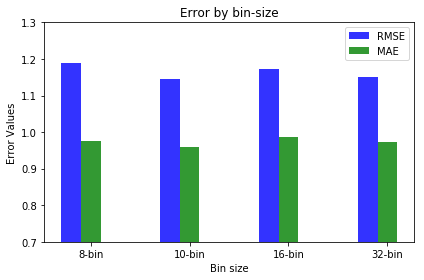

In [8]:
# data to plot
n_groups = 4


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, rmse_val, bar_width,alpha=opacity,color='b',label='RMSE')
 
rects2 = plt.bar(index + bar_width, mae_val, bar_width,alpha=opacity,color='g',label='MAE')
 
    
plt.xlabel('Bin size')
plt.ylabel('Error Values')
plt.title('Error by bin-size')
plt.xticks(index + bar_width, ('8-bin', '10-bin','16-bin','32-bin'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.70,1.3])

plt.show()

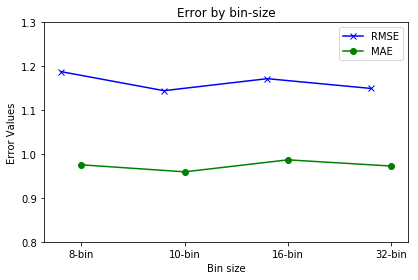

In [9]:
# LINE GRAPH
# data to plot
n_groups = 4


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.plot(index, rmse_val,color='b',label='RMSE',marker='x')
 
rects2 = plt.plot(index + bar_width, mae_val,color='g',label='MAE',marker='o')
 
    
plt.xlabel('Bin size')
plt.ylabel('Error Values')
plt.title('Error by bin-size')
plt.xticks(index + bar_width, ('8-bin', '10-bin','16-bin','32-bin'))
plt.legend()
 
plt.tight_layout()

axes = plt.gca()
axes.set_ylim([0.80,1.3])

plt.show()